# Reserarch project: Predicting Alcohol Percentage in Red Wine

Done by: Danylo Chystov

Student id: 991560947



**Goal:** Use regression models to predict the `alcohol` percentage in red wine based on its chemical properties following provided template of Regression Tutorial.

**Dataset:** `winequality-red.csv`  
**Target variable:** `alcohol`

Research plan:
1. Load and explore the dataset (EDA).
2. Build baseline and simple regression models.
3. Train and compare multiple regression models.
4. Evaluate models using R², MAE, MSE, RMSE.
5. Analyze the best model in more detail.

### Section 1: Preparation (imports & loading data)

In [32]:
## Step1: import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


## remove scikit harless warnings produced by some operatins 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", message=".*matmul.*")

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
## Step 2: Load the dataset
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

Current working directory: /Users/danchystov/Desktop/Sheridan/Fourth Year Courses/Sem_1/Artificial_Intelligence/Research Project


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
## Step 3: Data Exploration
print("Dataset shape:", df.shape)
print("Dataset info:", df.info())
print("Statistical summary:")
print(df.describe())

Dataset shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Dataset info: None
Statistical summary:
       fixed acidity  volatile acidity  citric acid  residua

### Section 2: Exploratory Data Analysis (EDA)

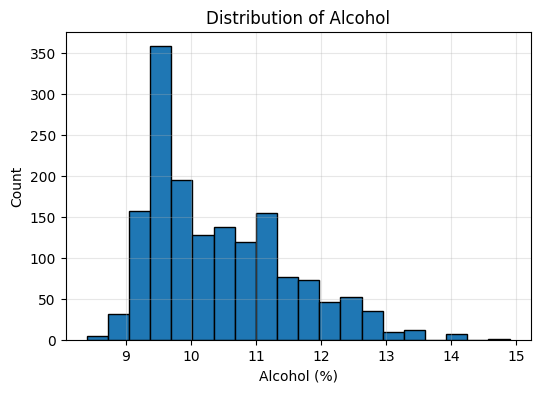

In [7]:
## Step 1: Discover the distribution of the target 'alcohol'

plt.figure(figsize=(6,4))
plt.hist(df["alcohol"], bins=20, edgecolor="black")
plt.title("Distribution of Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

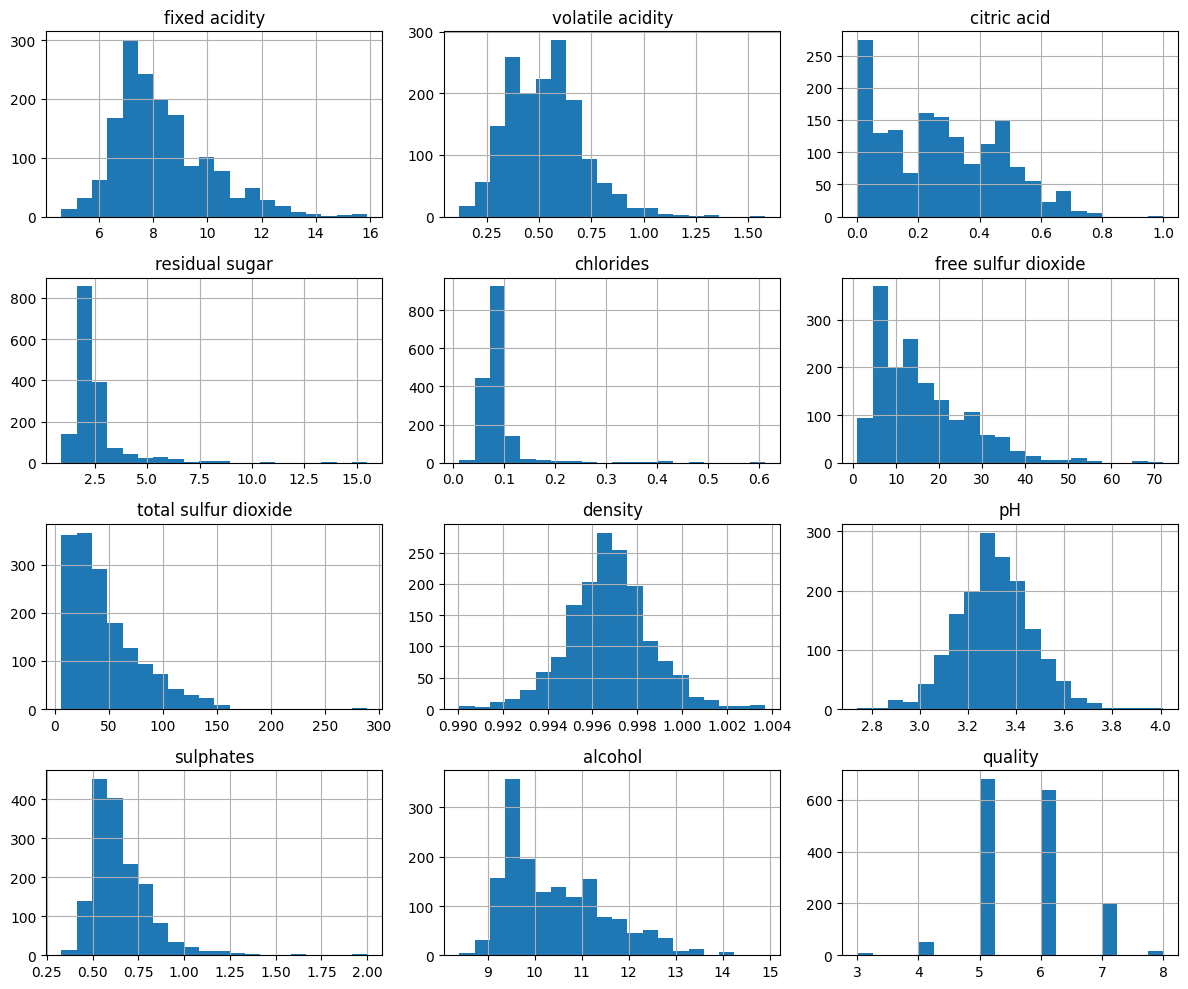

In [8]:
## Step 2: Discover the distribution of all  features
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

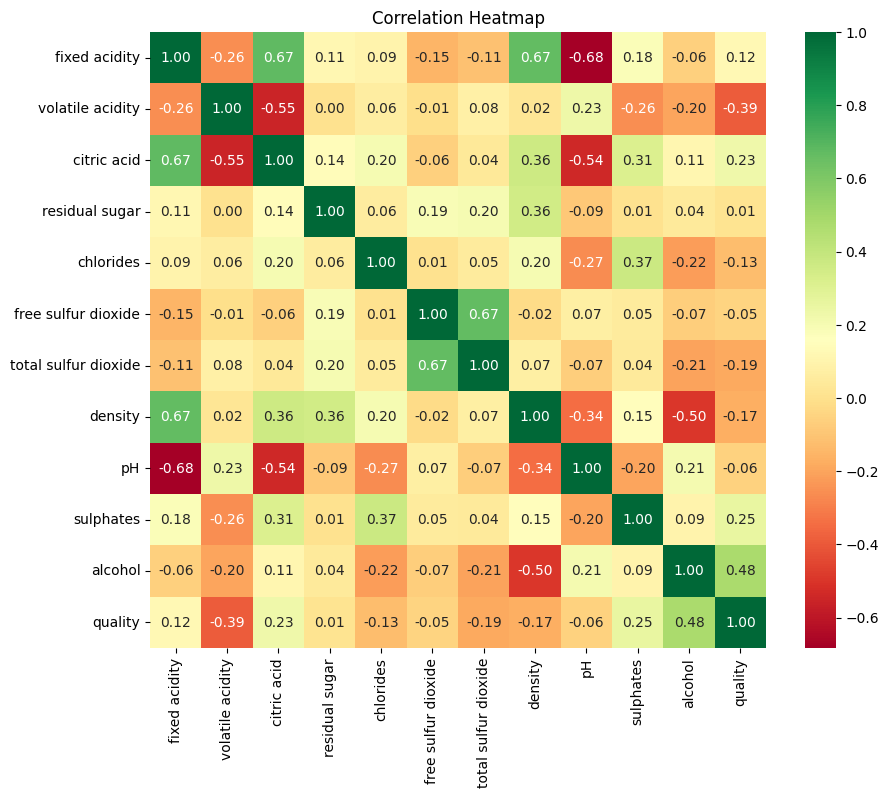

In [9]:
## Step 3: Check correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="RdYlGn", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
## Step 4: Check top correlated features with 'alcohol'
df.corr(numeric_only=True)["alcohol"].sort_values(ascending=False)

alcohol                 1.000000
quality                 0.476166
pH                      0.205633
citric acid             0.109903
sulphates               0.093595
residual sugar          0.042075
fixed acidity          -0.061668
free sulfur dioxide    -0.069408
volatile acidity       -0.202288
total sulfur dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64

##### Section 2 Findings

1. Most Alcohol values are between 9% and 12%.
2. Distribution is right-skewed.
3. Some variables are heavily right-skewed such as residual sugar, sulphates, sulfur dioxide.
4. Strong positive correlation between alcohol and quality (+0.476) and density (-0.496), which is logical since alcohol has lower density then water thus higher alcohol -> lower density.
5. Slight relation with pH (0.205).


**Strong predictors are:**
- density
- quality
- pH

### Section 3: Base Model


In [ ]:
# Step 1: Check baseline prediction: always predict the mean alcohol value
baseline_pred = np.full_like(df["alcohol"], df["alcohol"].mean(), dtype=float)

r2_baseline = r2_score(df["alcohol"], baseline_pred)
mae_baseline = mean_absolute_error(df["alcohol"], baseline_pred)
mse_baseline = mean_squared_error(df["alcohol"], baseline_pred)
rmse_baseline = np.sqrt(mse_baseline)

print("Baseline Mean Model")
print("R²:", r2_baseline)
print("MAE:", mae_baseline)
print("MSE:", mse_baseline)
print("RMSE:", rmse_baseline)

Baseline Mean Model
R²: 0.0
MAE: 0.877968563059855
MSE: 1.1349371714889036
RMSE: 1.0653343003437483


RMSE model is off by around 1% on avarage thus we will use it later as a benchmark.

### Section 4: Linear Regressio

In [ ]:
## Step 1: preparing feature and target
X_simple = df[["density"]]
y = df["alcohol"]

## Step 2: fitting the model
simple_reg = LinearRegression()
simple_reg.fit(X_simple, y)

print("Coefficient:", simple_reg.coef_[0])
print("Intercept:", simple_reg.intercept_)
print("R² (on all data):", simple_reg.score(X_simple, y))


Coefficient: -280.16382306826284
Intercept: 289.67534338256525
R² (on all data): 0.2461943643971075


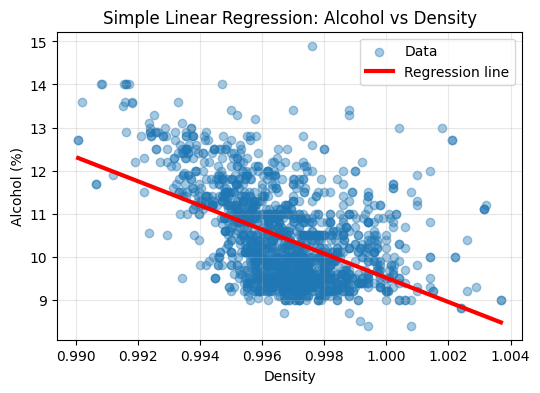

In [17]:
## Step 3: Draw plot regression

x_line = pd.DataFrame(
    {"density": np.linspace(df["density"].min(), df["density"].max(), 100)}
)

y_line = simple_reg.predict(x_line)

plt.figure(figsize=(6,4))
plt.scatter(df["density"], df["alcohol"], alpha=0.4, label="Data")
plt.plot(x_line["density"], y_line, color="red", linewidth=3, label="Regression line")
plt.xlabel("Density")
plt.ylabel("Alcohol (%)")
plt.title("Simple Linear Regression: Alcohol vs Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [21]:
## Step 4: Evaluate model performance

y_pred_simple = simple_reg.predict(X_simple)

r2_simple = r2_score(y, y_pred_simple)
mae_simple = mean_absolute_error(y, y_pred_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("Linear Regression (Density → Alcohol)")
print("R²:", r2_simple)
print("MAE:", mae_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)

Linear Regression (Density → Alcohol)
R²: 0.2461943643971075
MAE: 0.7469164970343727
MSE: 0.855522035923542
RMSE: 0.9249443420679657




### Section 4 Findings

- The scatter plot shows a clear **negative linear relationship** between alcohol and density, as expected.
- The model learned a **negative slope**, confirming that as density increases, predicted alcohol decreases.


#### **Interpretation**
- The model explains **24.6%** of the variation in alcohol content.
- Error is reduced compared to baseline: RMSE from 1.065 → 0.925.
- This simple model performs better than always predicting the mean, but still limited since it uses only a single feature.


### Section 5: Train/Test split and training Full Linear Regression model


In [26]:
## Step 1: define feature and target

X = df.drop("alcohol", axis=1)
y = df["alcohol"]

## Step 2: Test/Train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape


((1119, 11), (480, 11))

In [34]:
## Step 3: Fit fulll linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


## Step 4: Test

y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Multiple Linear Regression (All Features → Alcohol)")
print("Test R²:", r2)
print("Test MAE:", mae)
print("Test MSE:", mse)
print("Test RMSE:", rmse) 

Multiple Linear Regression (All Features → Alcohol)
Test R²: 0.7065698631753032
Test MAE: 0.4431326063604793
Test MSE: 0.3417546385413877
Test RMSE: 0.5845978434286152


### Section 5 Results

- Model explains 70.7% of variation in alcohol.
- Average error ≈ 0.44% alcohol, much better than simple model.
- Solid improvement in RMSE over baseline model (1.065) and simple model (0.925)

**Summary:**
- Full Linear Regression model is 3× more accurate than the simple model.
- It is about 2 times more accurate than the baseline one.

### Section 6: Compare Linear, Ridge, Lasso, Trees and Random Forest models

In [33]:
## helper method to format output and compare easier
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "model": name,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    }



## Step 1: Defining models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge(alpha=1.0)),
    ("Lasso", Lasso(alpha=0.001, max_iter=10000)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=200, random_state=42)),
    ("KNN", KNeighborsRegressor(n_neighbors=5))
]

## Step 2: Evaluate all models
results = []

for name, model in models:
    results.append(evaluate_model(name, model, X_train, X_test, y_train, y_test))

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)

,model,R2,MAE,RMSE
4,Random Forest,0.779818,0.363403,0.506403
0,Linear Regression,0.706570,0.443133,0.584598
3,Decision Tree,0.577527,0.462031,0.701462
2,Lasso,0.326529,0.697051,0.885655
1,Ridge,0.323192,0.698172,0.887846
5,KNN,0.113542,0.769931,1.016094


##### Section 6 Results

- Top model is **Random Forest** as it explains 78% of varience has lowest prediction error and most accurate absolute predictions.
- Second place with medium gap between first is Linear regression.
- Decision Tree sits in the middle showing moderate results.
- Lasso and Ridge perform poorly since data set is not strongly multicollinear thus regularization shrinks usefull coefficients resulting in bad performance of these models.
- KNN shown worst results.

### Section 7: Deep analysis of the best model: Random Forest

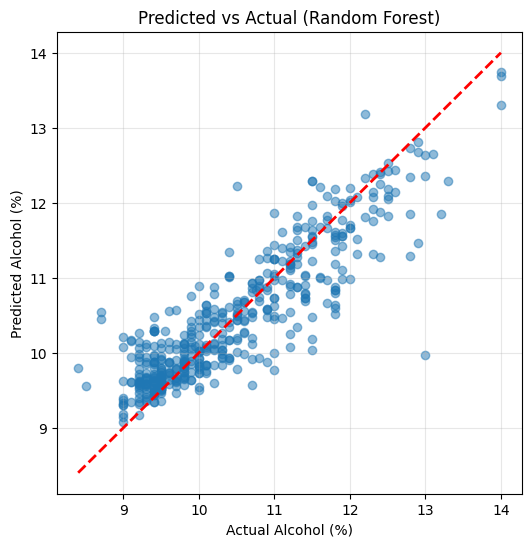

In [36]:
## Step 1: Retrain the model

best_model = RandomForestRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

## Step 2: See model predictions vs actual values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.xlabel("Actual Alcohol (%)")
plt.ylabel("Predicted Alcohol (%)")
plt.title("Predicted vs Actual (Random Forest)")
plt.grid(alpha=0.3)
plt.show()

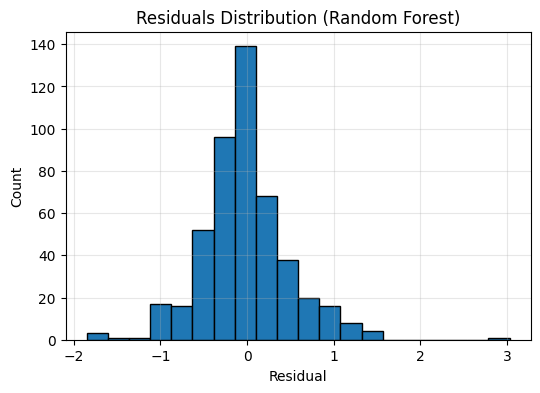

In [37]:
## Step 3: Residuals distribution

residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor="black")
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

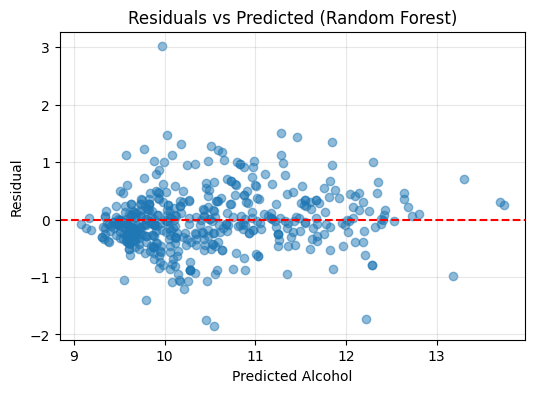

In [38]:
## Step 4: Explore Residuals vs Predicted

residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Alcohol")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Random Forest)")
plt.grid(alpha=0.3)
plt.show()

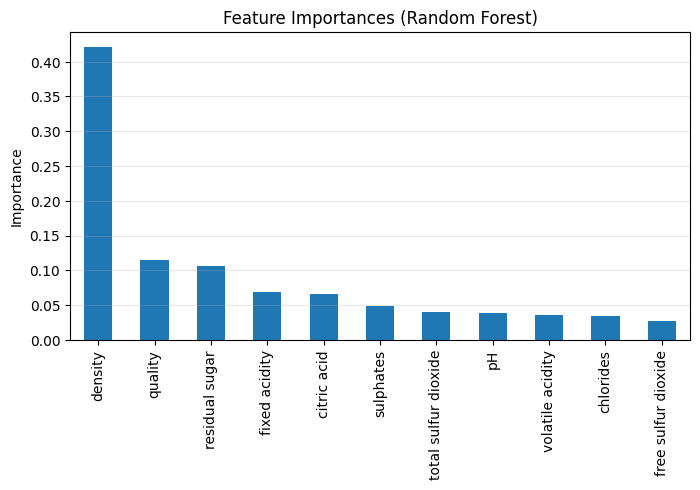

In [ ]:
## Step 5: Explore Feature importances

importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Section 7 Results and Conclusion (Random Forest)

Based on the model comparison in Section 6, **Random Forest Regressor** was the top-performing model with following results:

- R^2 ~ 0.780
- MAE ~ 0.363
- RMSE ~ 0.506

---

The scatter plot from Step 2, shows that predictions located closely to the diagonal 1:1 line, thus we can make conclusions that:

- The model captures the relationship between features and alcohol quite well.
- Errors are small and evenly distributed.

This confirms strong predictive accuracy.

---

## Step 3 Residual Distribution

- Do have a spread but dominating number of vales are around 0.
- Have few extreme values, indicating low bias.
- Most errors between –1 and +1 alcohol percentage.

---

## Step 4 Residuals vs Predicted

The residual plot shows:

- No strong patterns horizontal noise cloud.
- Similar spread across all prediction levels.
- A few outliers, which is normal.

---

## Step 5 Feature Importance

Feature importance shows us which variables Random Forest relied on the most:

1. density ≈ 0.42 – as expected the strongest predictor  
2. quality 
3. residual sugar
4. fixed acidity
5. citric acid 
6. sulphates  
7. total sulfur dioxide  
8. pH  
9. volatile acidity  
10. chlorides  
11. free sulfur dioxide (lowest)

- Density dominates because it is physically linked to alcohol percentage (lower density -> higher alcohol as it has lower densty then water itself).
- Quality is positively correlated with alcohol, so the model expectedly used it.
- Nodel relied less on acidity, sulphates, and sulfur compounds.

The importance ranking of values positively aligns with the correlations observed in the Section 2, Step 4: EDA.

---

## Section 7 Conclusion
Random Forest is the best performing model for predicting alcohol percentage in the red wine dataset.  
It has showed the lowest error, no major issues in residuals, and correctly identifies density as the key predictive feature.
